In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map target integers to actual species names
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Display the first five rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


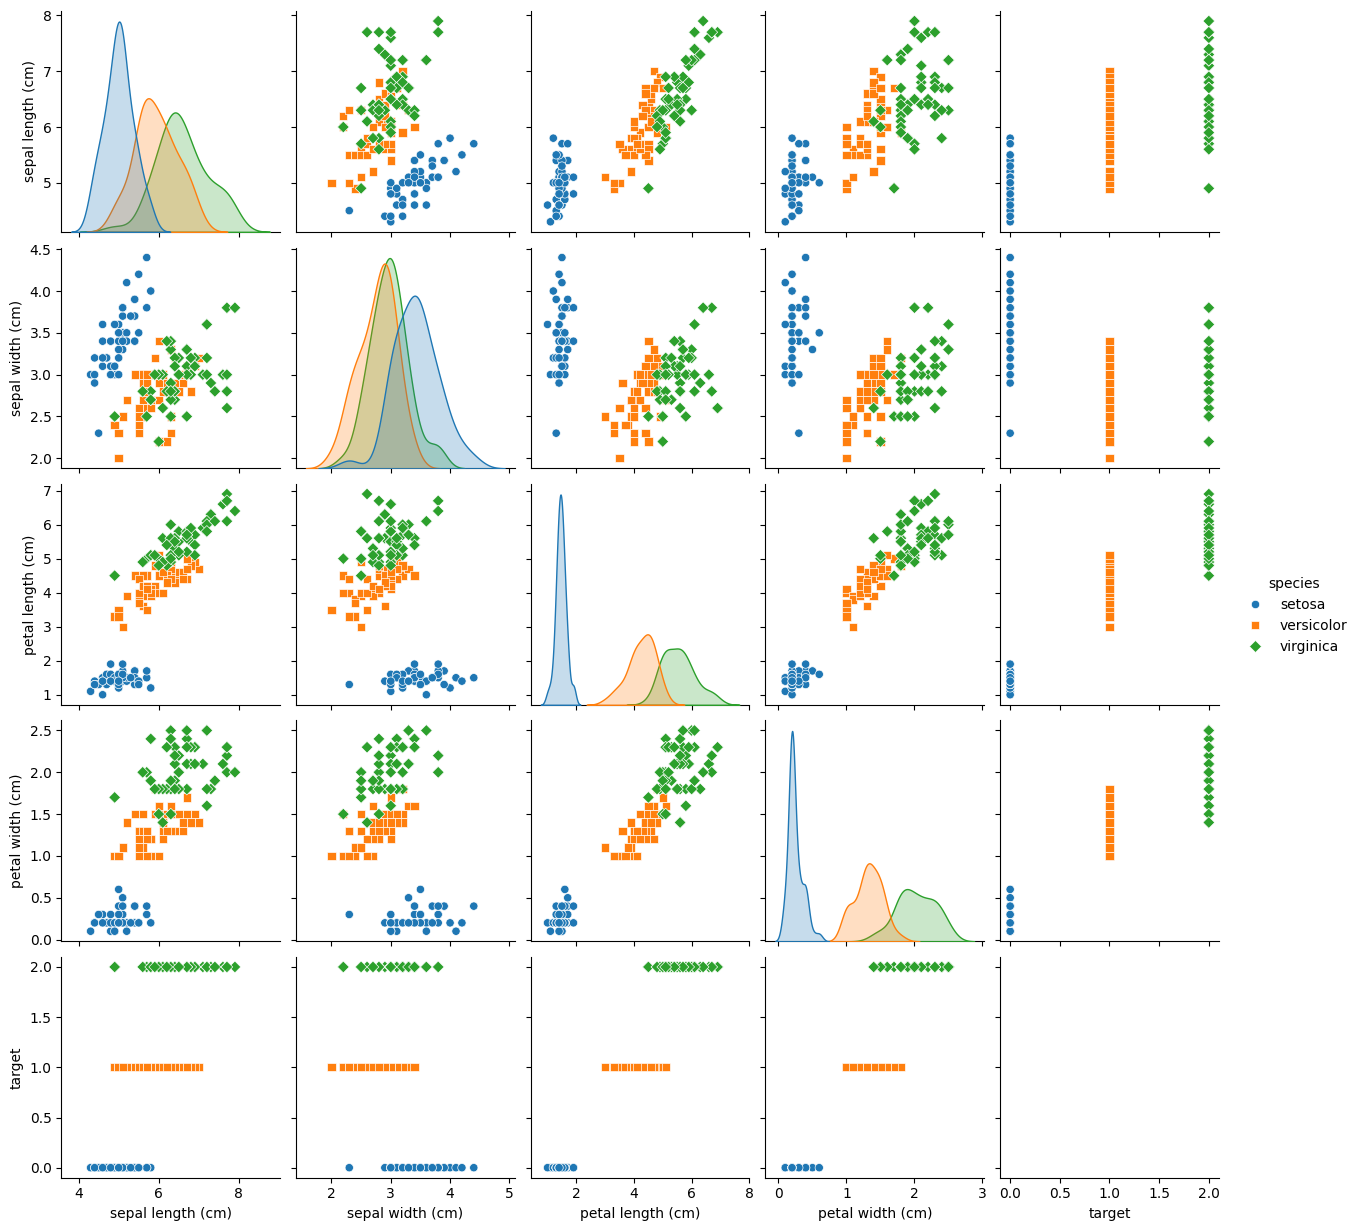

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
# Check for missing values
print(df.isnull().sum())

# Visualize pairwise relationships
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Display summary statistics
print(df.describe())


In [6]:
# Features and target variable
X = df.iloc[:, :-2].values  # all rows, all columns except last two
y = df['species'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 120
Testing samples: 30


In [8]:
# Initialize KNN with k=5
k = 17
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [9]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy: 96.67%


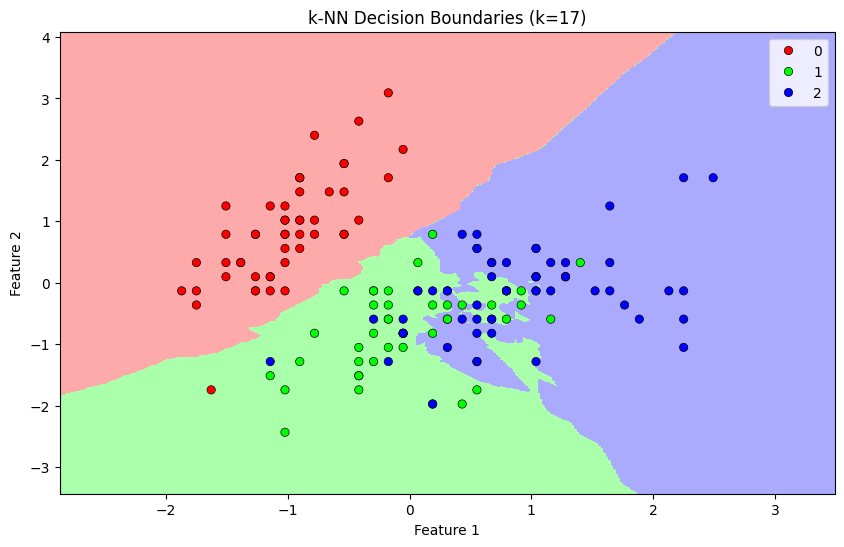

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

def plot_decision_boundaries(X, y, classifier, title):
    # Define the mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict classifications for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Only using the first two features for visualization
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold.colors, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Import the dataset and necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the KNN classifier
k = 17 
knn_vis = KNeighborsClassifier(n_neighbors=k)
knn_vis.fit(X_train, y_train)

# Plot the decision boundaries
plot_decision_boundaries(X_scaled, y, knn_vis, f'k-NN Decision Boundaries (k={k})')